# IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='darkgrid', palette='icefire', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# LOAD AND READ THE DATASET

In [2]:
covid_df = pd.read_csv('D:\\PROJECT\\Covid_Dataset.csv')
covid_df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


# DATA PRE-PROCESSING

In [3]:
covid_df.shape

(5434, 21)

In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [5]:
covid_df.describe().transpose()

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [6]:
covid_df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [7]:
covid_df.rename(columns = {'Gastrointestinal ':'Gastrointestinal', 'Fatigue ':'Fatigue'}, inplace = True)

In [8]:
covid_df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
       'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [9]:
# Create a table with missing values:
null_values = covid_df.isnull().sum()

value = {
    'Null_values ':null_values 
}
null_frame=pd.DataFrame(value)
null_frame

,Null_values
Breathing Problem,0
Fever,0
Dry Cough,0
Sore throat,0
Running Nose,0
Asthma,0
Chronic Lung Disease,0
Headache,0
Heart Disease,0
Diabetes,0


# DATA VISUALIZATION

<AxesSubplot:xlabel='COVID-19', ylabel='count'>

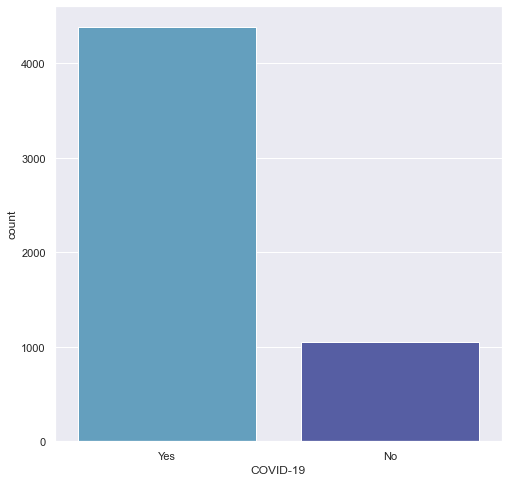

In [10]:
sns.countplot(x='COVID-19',data=covid_df)

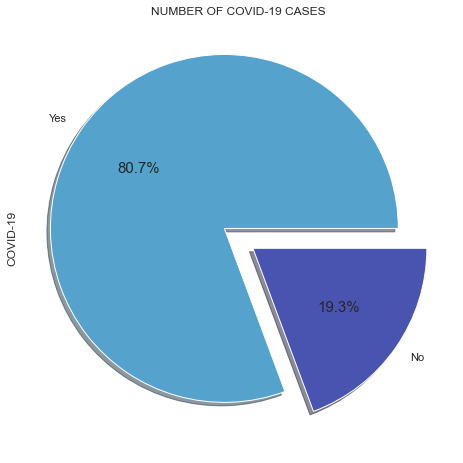

In [11]:
covid_df["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('NUMBER OF COVID-19 CASES');

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

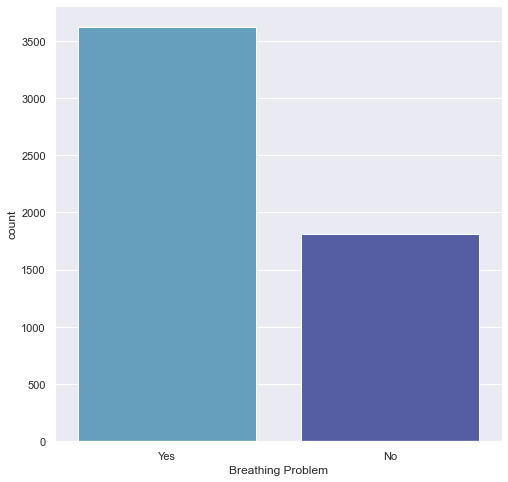

In [12]:
sns.countplot(x='Breathing Problem',data=covid_df)

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

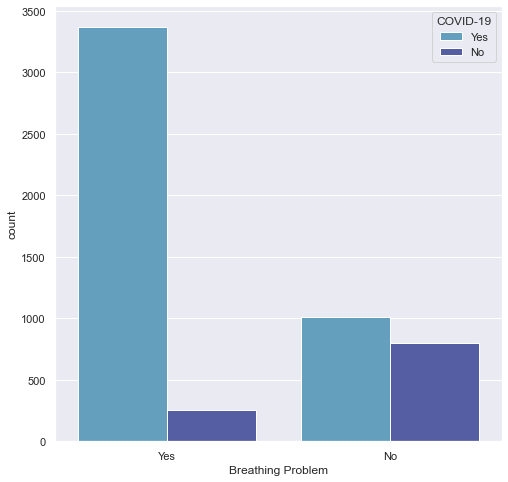

In [13]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_df)

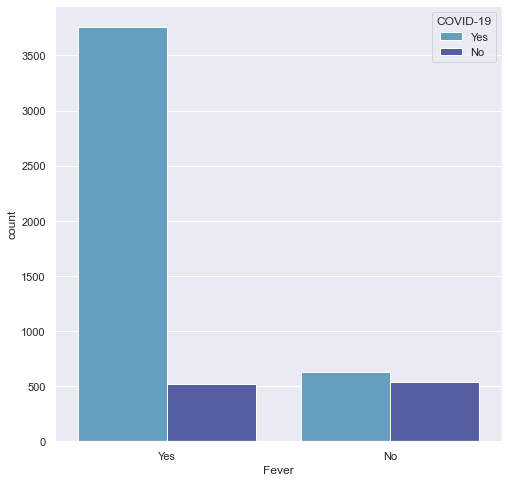

In [14]:
sns.countplot(x='Fever',hue='COVID-19',data=covid_df);

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

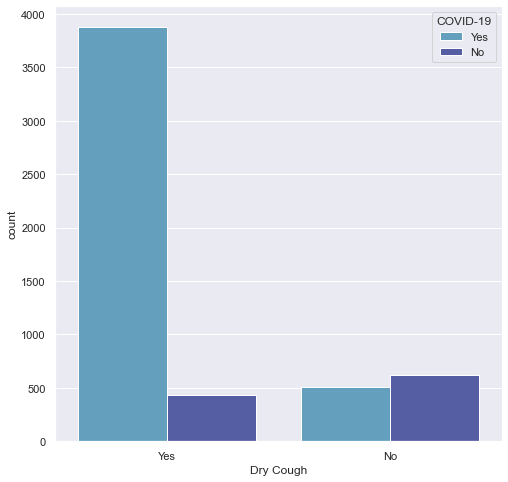

In [15]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_df)

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

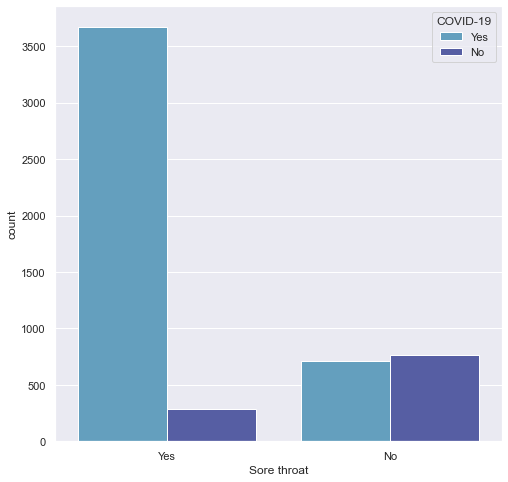

In [16]:
sns.countplot(x='Sore throat',hue='COVID-19',data=covid_df)

<AxesSubplot:xlabel='Contact with COVID Patient', ylabel='count'>

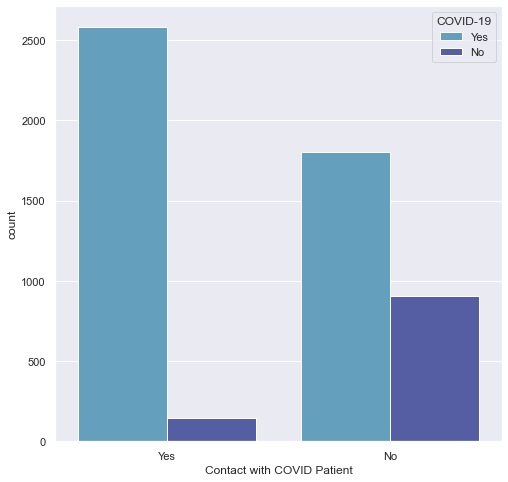

In [17]:
sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_df)

# FEATURE TRANSFORMATION

In [18]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [19]:
for x in covid_df.columns:
  covid_df[x] = e.fit_transform(covid_df[x])

In [20]:
covid_df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [21]:
covid_df.dtypes.value_counts()

int32    21
dtype: int64

# Info about our data after transformation 

In [22]:
covid_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Breathing Problem,5434.0,0.666176,0.471621,0.0,0.0,1.0,1.0,1.0
Fever,5434.0,0.786345,0.409924,0.0,1.0,1.0,1.0,1.0
Dry Cough,5434.0,0.792602,0.405480,0.0,1.0,1.0,1.0,1.0
Sore throat,5434.0,0.727457,0.445309,0.0,0.0,1.0,1.0,1.0
Running Nose,5434.0,0.543246,0.498172,0.0,0.0,1.0,1.0,1.0
Asthma,5434.0,0.462643,0.498648,0.0,0.0,0.0,1.0,1.0
Chronic Lung Disease,5434.0,0.472028,0.499263,0.0,0.0,0.0,1.0,1.0
Headache,5434.0,0.503497,0.500034,0.0,0.0,1.0,1.0,1.0
Heart Disease,5434.0,0.464299,0.498770,0.0,0.0,0.0,1.0,1.0
Diabetes,5434.0,0.476261,0.499482,0.0,0.0,0.0,1.0,1.0


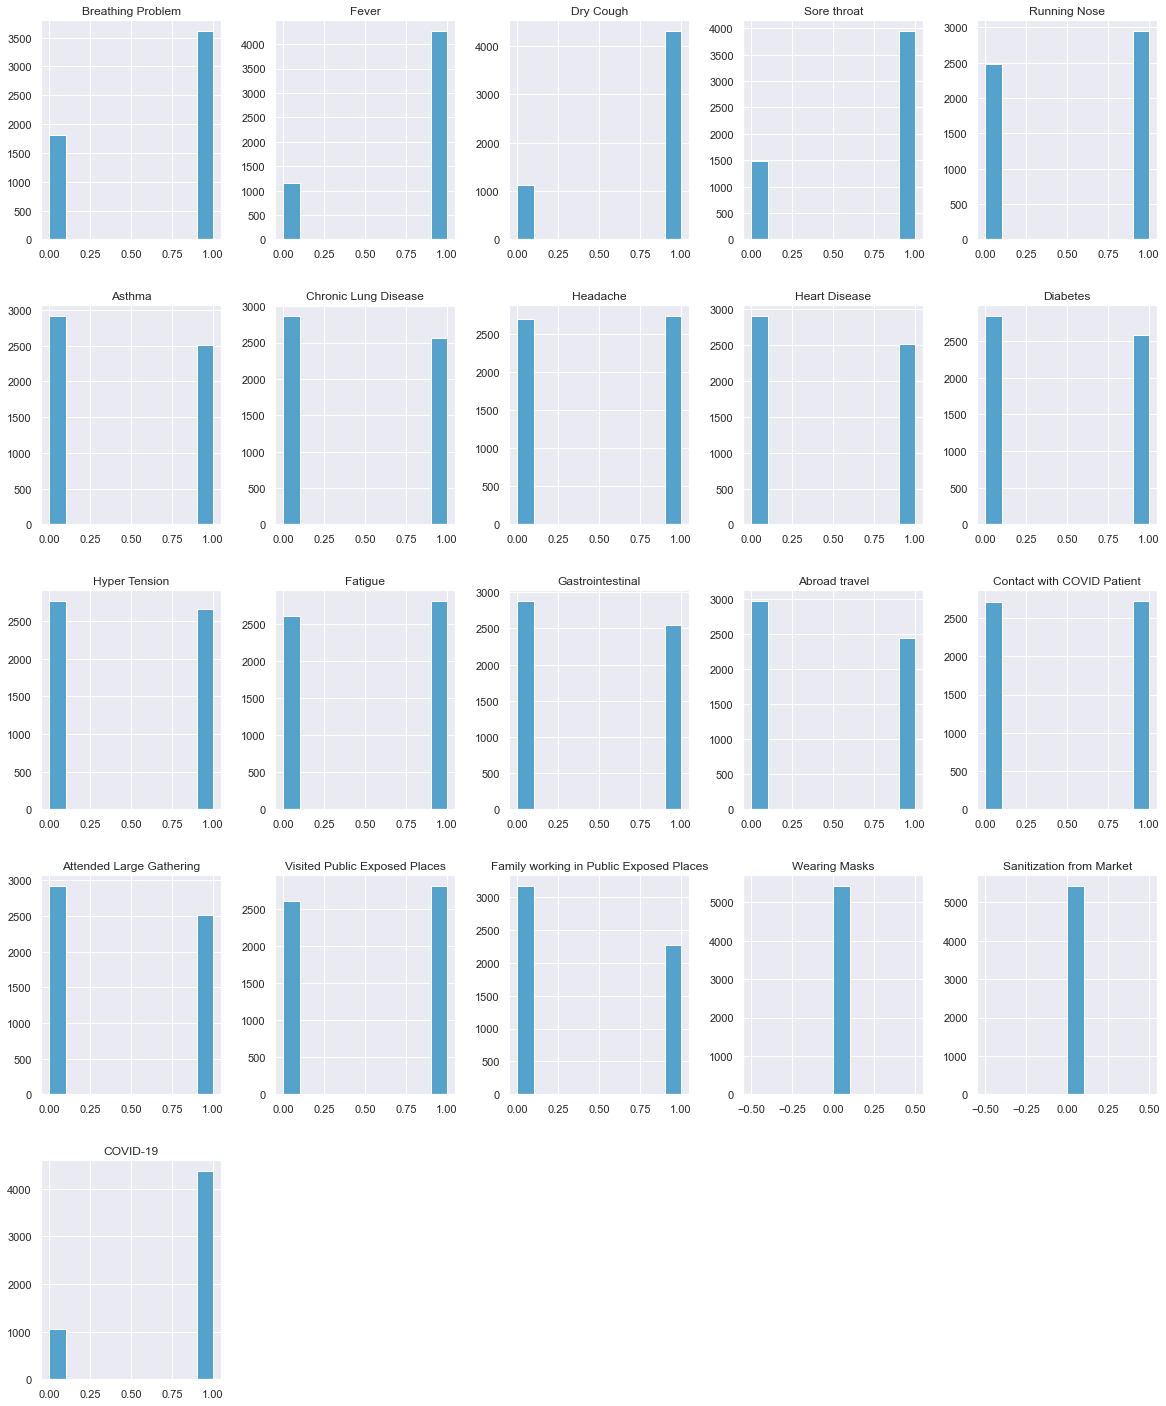

In [23]:
covid_df.hist(figsize=(20, 25));

# CORRELATION BETWEEN FEATURES

In [24]:
corr = covid_df.corr()
corr.style.background_gradient(cmap='icefire',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


# FEATURE SELECTION

In [25]:
drop_columns = ['Running Nose', 'Chronic Lung Disease', 'Headache', 'Heart Disease','Diabetes','Gastrointestinal',
                'Wearing Masks','Sanitization from Market','Asthma','Fatigue']

for column in drop_columns:
  covid_df = covid_df.drop(column, axis = 1)


In [26]:
corr = covid_df.corr()
corr.style.background_gradient(cmap='icefire',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145
Visited Public Exposed Places,0.066688,0.002252,0.086176,0.079055,0.019174,0.069609,0.079800,0.083795,1.000000,0.028486,0.119755
Family working in Public Exposed Places,0.018295,0.012102,0.163102,0.104378,0.048152,0.143094,0.006909,0.063776,0.028486,1.000000,0.160208


In [27]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [28]:
x=covid_df.drop('COVID-19',axis=1)
y=covid_df['COVID-19']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
#Fit the model
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
#Score/Accuracy
acc_logreg=model1.score(x_test, y_test)*100
acc_logreg

96.13733905579399

# RANDOM FOREST

In [31]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)
#Fit
model2.fit(x_train, y_train)
#Score/Accuracy
acc_randomforest=model2.score(x_test, y_test)*100
acc_randomforest

89.03048376178661

# GRADIENT BOOSTING CLASSIFIER

In [32]:
#Train the model
from sklearn.ensemble import GradientBoostingClassifier
GBR = GradientBoostingClassifier(n_estimators=100, max_depth=4)
#Fit
GBR.fit(x_train, y_train)
acc_gbk=GBR.score(x_test, y_test)*100
acc_gbk

97.30226854690373

# K-NEIGHBORS CLASSIFIER

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#Score/Accuracy
acc_knn=knn.score(x_test, y_test)*100
acc_knn

97.0570202329859

# DECISION TREE CLASSIFIER

In [34]:
from sklearn import tree
t = tree.DecisionTreeClassifier()
t.fit(x_train,y_train)
y_pred = t.predict(x_test)
#Score/Accuracy
acc_decisiontree=t.score(x_test, y_test)*100
acc_decisiontree



97.11833231146537

# NAIVE BAYES

In [35]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train,y_train)
#Score/Accuracy
acc_gaussian= model3.score(x_test, y_test)*100
acc_gaussian

74.73942366646229

# SUPPORT VECTOR MACHINE

In [36]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
#Score/Accuracy
acc_svc=clf.score(x_test, y_test)*100
acc_svc

95.89209074187615

In [37]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','Gradient Boosting Classifier',
              'KNN', 'Decision Tree','Naive Bayes', 'Support Vector Machines'],
    'Score': [acc_logreg,acc_randomforest, acc_gbk,
              acc_knn, acc_decisiontree,acc_gaussian,acc_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Gradient Boosting Classifier,97.302269
4,Decision Tree,97.118332
3,KNN,97.057020
0,Logistic Regression,96.137339
6,Support Vector Machines,95.892091
1,Random Forest,89.030484
5,Naive Bayes,74.739424


# CONFUSION MATRIX AND CLASSIFICATION REPORT

In [38]:
prediction = t.predict(x_test)
prediction

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test,prediction))

[[ 279   15]
 [  32 1305]]


              precision    recall  f1-score   support

           0       0.90      0.95      0.92       294
           1       0.99      0.98      0.98      1337

    accuracy                           0.97      1631
   macro avg       0.94      0.96      0.95      1631
weighted avg       0.97      0.97      0.97      1631

